In [31]:
# i imported the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')


plt.style.use('seaborn-v0_8')
%matplotlib inline


In [32]:
beneficiary = pd.read_csv('../Data/Train/Train_Beneficiarydata-1542865627584.csv')
inpatient = pd.read_csv('../Data/Train/Train_Inpatientdata-1542865627584.csv')
outpatient = pd.read_csv('../Data/Train/Train_Outpatientdata-1542865627584.csv')
labels = pd.read_csv('../Data/Train/Train-1542865627584.csv')

print("All datasets loaded successfully!")
print(f"Beneficiary: {beneficiary.shape}")
print(f"Inpatient: {inpatient.shape}")
print(f"Outpatient: {outpatient.shape}")
print(f"Labels: {labels.shape}")

All datasets loaded successfully!
Beneficiary: (138556, 25)
Inpatient: (40474, 30)
Outpatient: (517737, 27)
Labels: (5410, 2)


Fraud vs Non-Fraud Providers:
PotentialFraud
No     4904
Yes     506
Name: count, dtype: int64
Percentage:
PotentialFraud
No     90.64695
Yes     9.35305
Name: proportion, dtype: float64


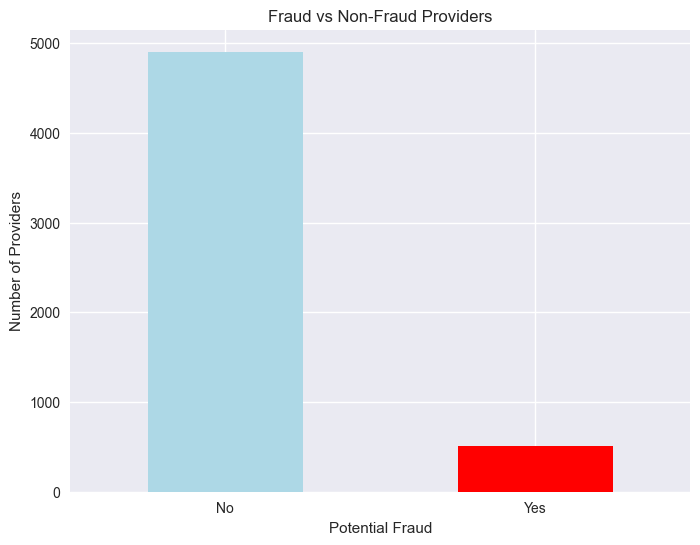

In [33]:
# Check the target variable distribution
print("Fraud vs Non-Fraud Providers:")
print(labels['PotentialFraud'].value_counts())
print("Percentage:")
print(labels['PotentialFraud'].value_counts(normalize=True) * 100)

# Visualize the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
labels['PotentialFraud'].value_counts().plot(kind='bar', color=['lightblue', 'red'])
plt.title('Fraud vs Non-Fraud Providers')
plt.xlabel('Potential Fraud')
plt.ylabel('Number of Providers')
plt.xticks(rotation=0)
plt.show()

In [34]:
print(" Dataset Structures:")

print(f"\nBeneficiary: {beneficiary.shape}")
print("Columns:", beneficiary.columns.tolist())

print(f"\nInpatient: {inpatient.shape}")
print("Columns:", inpatient.columns.tolist())

print(f"\nOutpatient: {outpatient.shape}")
print("Columns:", outpatient.columns.tolist())

print(f"\nLabels: {labels.shape}")
print("Columns:", labels.columns.tolist())

 Dataset Structures:

Beneficiary: (138556, 25)
Columns: ['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']

Inpatient: (40474, 30)
Columns: ['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosis

In [35]:
print("Missing Values:")

print(f"\nBeneficiary - Missing values:")
print(beneficiary.isnull().sum().sum(), "total missing values")

print(f"\nInpatient - Missing values:")
print(inpatient.isnull().sum().sum(), "total missing values")

print(f"\nOutpatient - Missing values:")
print(outpatient.isnull().sum().sum(), "total missing values")

Missing Values:

Beneficiary - Missing values:
137135 total missing values

Inpatient - Missing values:
344003 total missing values

Outpatient - Missing values:
8093719 total missing values


In [36]:
print("Looking for common columns to join tables:")

print("\nCommon columns between Beneficiary and Inpatient:")
common_bi = set(beneficiary.columns) & set(inpatient.columns)
print(common_bi)

print("\nCommon columns between Beneficiary and Outpatient:")
common_bo = set(beneficiary.columns) & set(outpatient.columns)
print(common_bo)

print("\nCommon columns between Claims and Labels:")
common_cl = set(inpatient.columns) & set(labels.columns)
print(common_cl)

Looking for common columns to join tables:

Common columns between Beneficiary and Inpatient:
{'BeneID'}

Common columns between Beneficiary and Outpatient:
{'BeneID'}

Common columns between Claims and Labels:
{'Provider'}


In [37]:
print("Detailed Missing Values Analysis:")

print("\n Beneficiary - Top missing columns:")
beneficiary_missing = beneficiary.isnull().sum().sort_values(ascending=False)
print(beneficiary_missing[beneficiary_missing > 0])

print("\n Inpatient - Top missing columns:")
inpatient_missing = inpatient.isnull().sum().sort_values(ascending=False)
print(inpatient_missing[inpatient_missing > 0].head(10))

print("\n Outpatient - Top missing columns:")
outpatient_missing = outpatient.isnull().sum().sort_values(ascending=False)
print(outpatient_missing[outpatient_missing > 0].head(10))

Detailed Missing Values Analysis:

 Beneficiary - Top missing columns:
DOD    137135
dtype: int64

 Inpatient - Top missing columns:
ClmProcedureCode_6     40474
ClmProcedureCode_5     40465
ClmProcedureCode_4     40358
ClmProcedureCode_3     39509
ClmDiagnosisCode_10    36547
OtherPhysician         35784
ClmProcedureCode_2     35020
ClmProcedureCode_1     17326
OperatingPhysician     16644
ClmDiagnosisCode_9     13497
dtype: int64

 Outpatient - Top missing columns:
ClmProcedureCode_5     517737
ClmProcedureCode_6     517737
ClmProcedureCode_4     517735
ClmProcedureCode_3     517733
ClmProcedureCode_2     517701
ClmProcedureCode_1     517575
ClmDiagnosisCode_10    516654
ClmDiagnosisCode_9     502899
ClmDiagnosisCode_8     494825
ClmDiagnosisCode_7     484776
dtype: int64


In [38]:
print("Sample Data from Each Table:")

print("\nBeneficiary - Sample:")
display(beneficiary[['BeneID', 'Gender', 'State', 'ChronicCond_Diabetes']].head(3))

print("\nInpatient - Sample:")
display(inpatient[['BeneID', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician']].head(3))

print("\nOutpatient - Sample:")
display(outpatient[['BeneID', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician']].head(3))

print("\nLabels - Sample:")
display(labels.head(3))

Sample Data from Each Table:

Beneficiary - Sample:


,BeneID,Gender,State,ChronicCond_Diabetes
0,BENE11001,1,39,1
1,BENE11002,2,39,2
2,BENE11003,1,52,2



Inpatient - Sample:


,BeneID,Provider,InscClaimAmtReimbursed,AttendingPhysician
0,BENE11001,PRV55912,26000,PHY390922
1,BENE11001,PRV55907,5000,PHY318495
2,BENE11001,PRV56046,5000,PHY372395



Outpatient - Sample:


,BeneID,Provider,InscClaimAmtReimbursed,AttendingPhysician
0,BENE11002,PRV56011,30,PHY326117
1,BENE11003,PRV57610,80,PHY362868
2,BENE11003,PRV57595,10,PHY328821



Labels - Sample:


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No


Checking for Duplicate Records:
Duplicate beneficiaries: 0
Duplicate inpatient claims: 0
Duplicate outpatient claims: 0
Duplicate provider labels: 0
Fraud vs Non-Fraud Providers:
PotentialFraud
No     4904
Yes     506
Name: count, dtype: int64

Percentage:
PotentialFraud
No     90.64695
Yes     9.35305
Name: proportion, dtype: float64


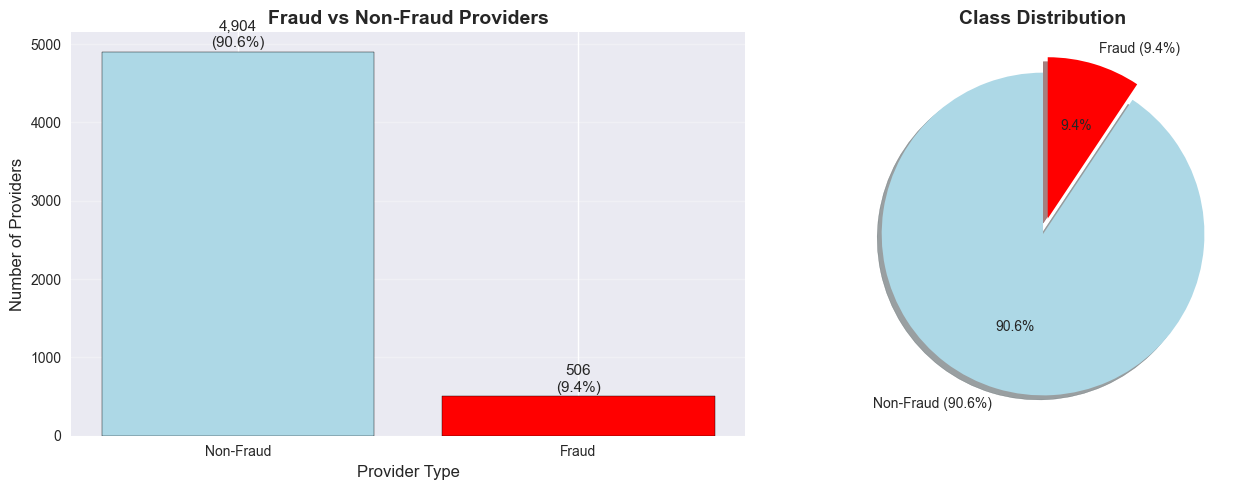

TEMPORAL ANALYSIS - CLAIM TRENDS


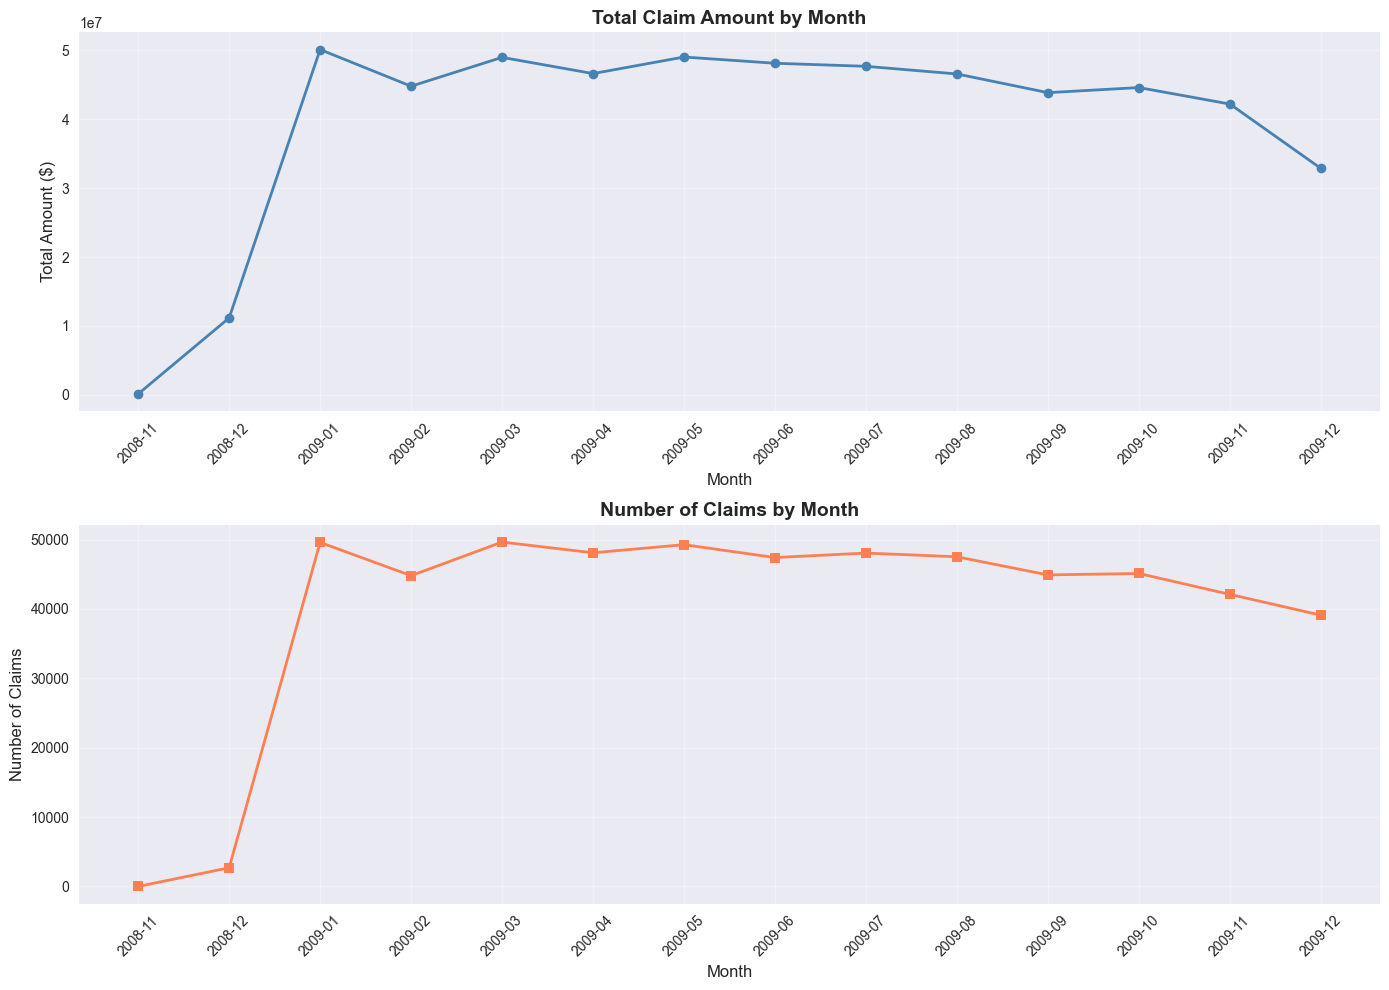

GEOGRAPHIC ANALYSIS

Top 10 States by Fraud Rate:
       Provider_Count  Fraud_Rate
State                            
49                106      0.1887
30                 18      0.1667
53                 18      0.1667
22                 80      0.1500
33                231      0.1472
44                113      0.1416
31                 78      0.1410
1                 102      0.1373
39                172      0.1337
13                 46      0.1304

Bottom 10 States by Fraud Rate:
       Provider_Count  Fraud_Rate
State                            
20                 40      0.0500
12                 22      0.0455
19                177      0.0452
37                122      0.0410
51                 75      0.0400
35                 30      0.0333
54                 64      0.0312
28                 66      0.0303
9                   7      0.0000
41                  4      0.0000


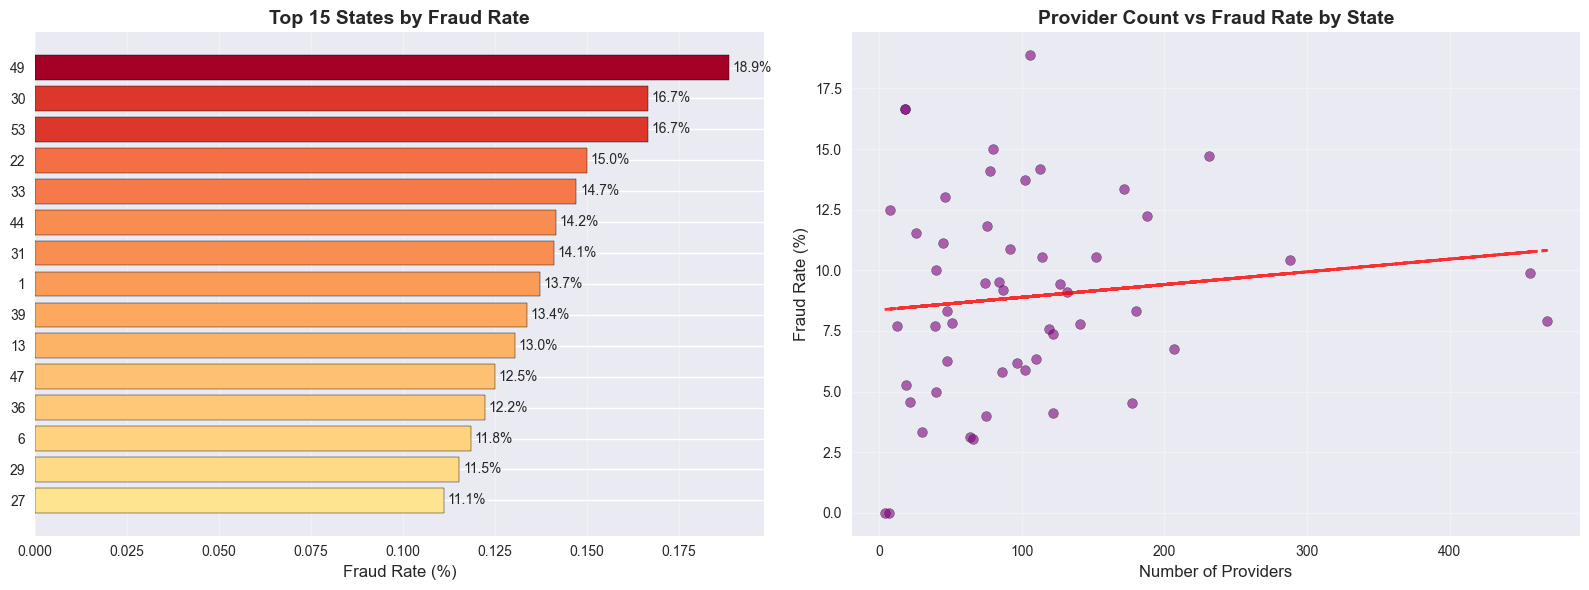

DETAILED FRAUD vs NON-FRAUD COMPARISON

Statistical Comparison of Key Metrics (Fraud vs Non-Fraud):
                      Metric    Fraud_Mean  NonFraud_Mean     Ratio  T-Statistic      P-Value  Significant
  InscClaimAmtReimbursed_sum 584350.039526   53193.723491 10.985319    18.509608 7.808291e-59         True
 InscClaimAmtReimbursed_mean   3842.794980    1523.780791  2.521882    13.160883 7.245996e-35         True
InscClaimAmtReimbursed_count    420.545455      70.435359  5.970658    10.879004 6.352459e-25         True
       DeductibleAmtPaid_sum  49360.219368    3819.074429 12.924655    16.469109 3.895588e-49         True
VISUAL DISTRIBUTION COMPARISON


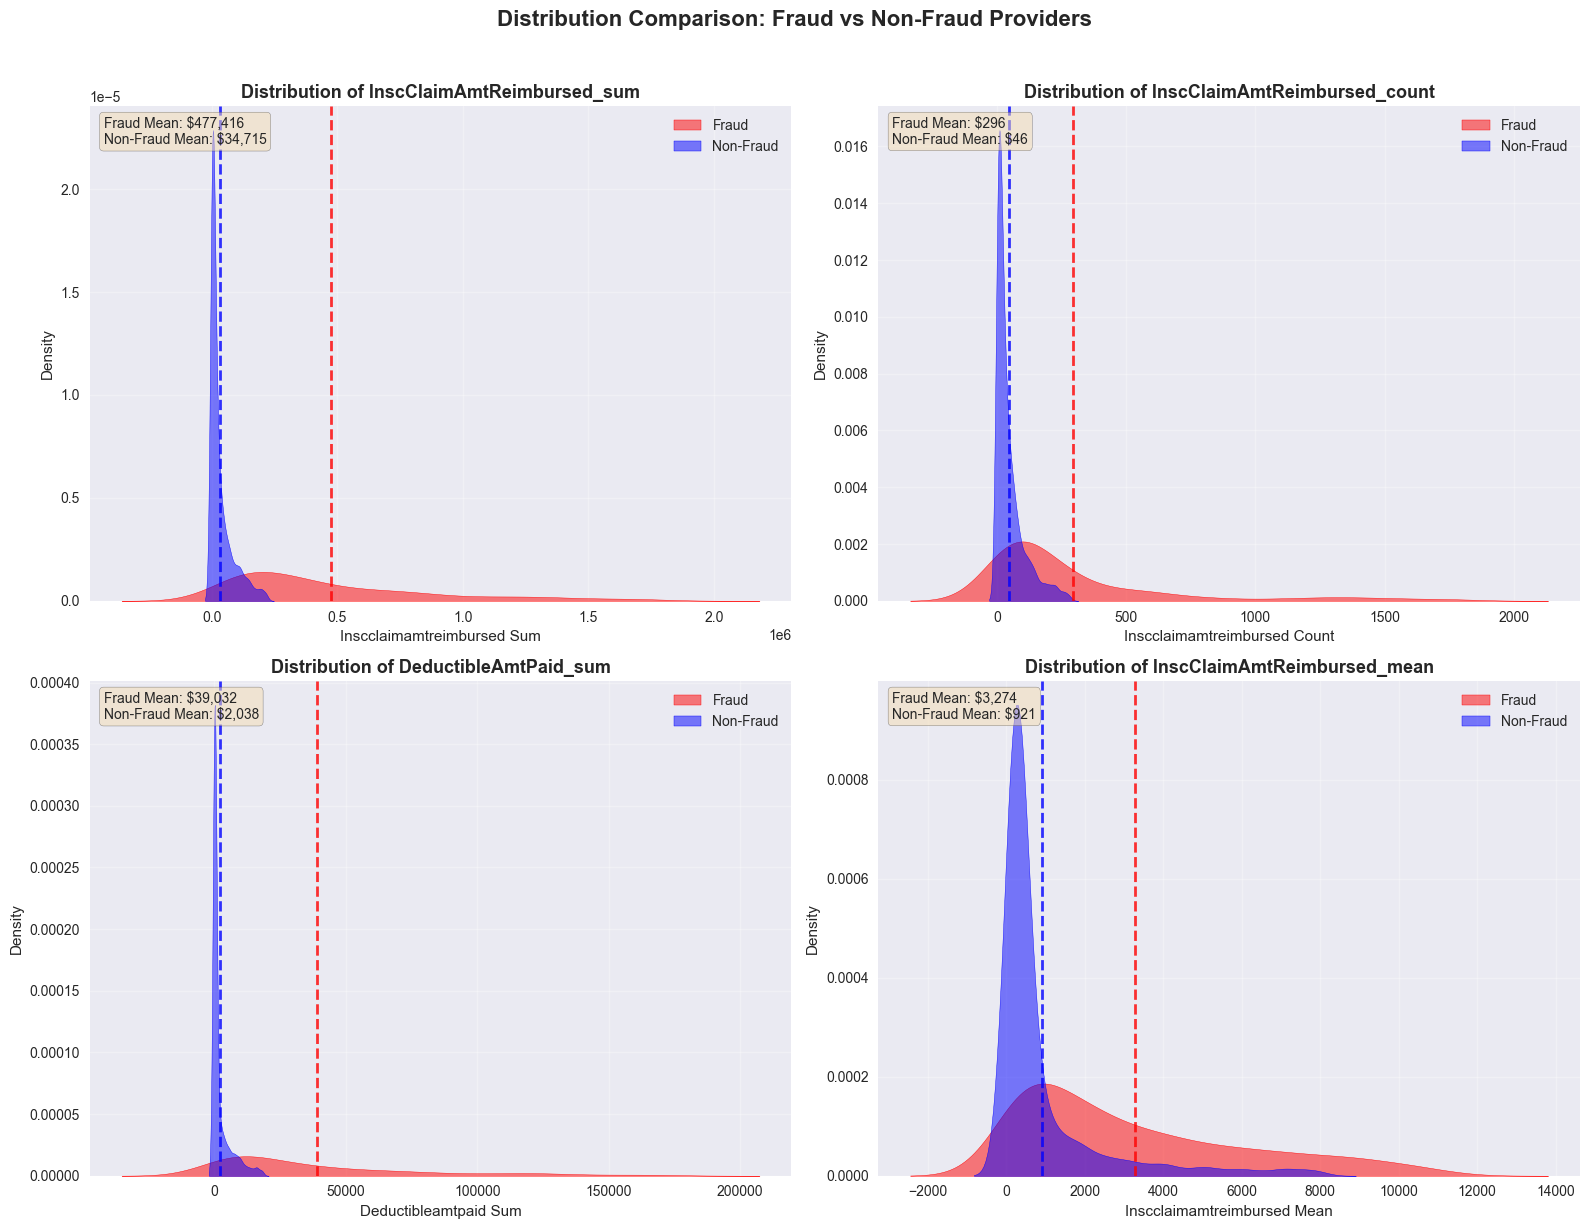

BOX PLOT COMPARISON


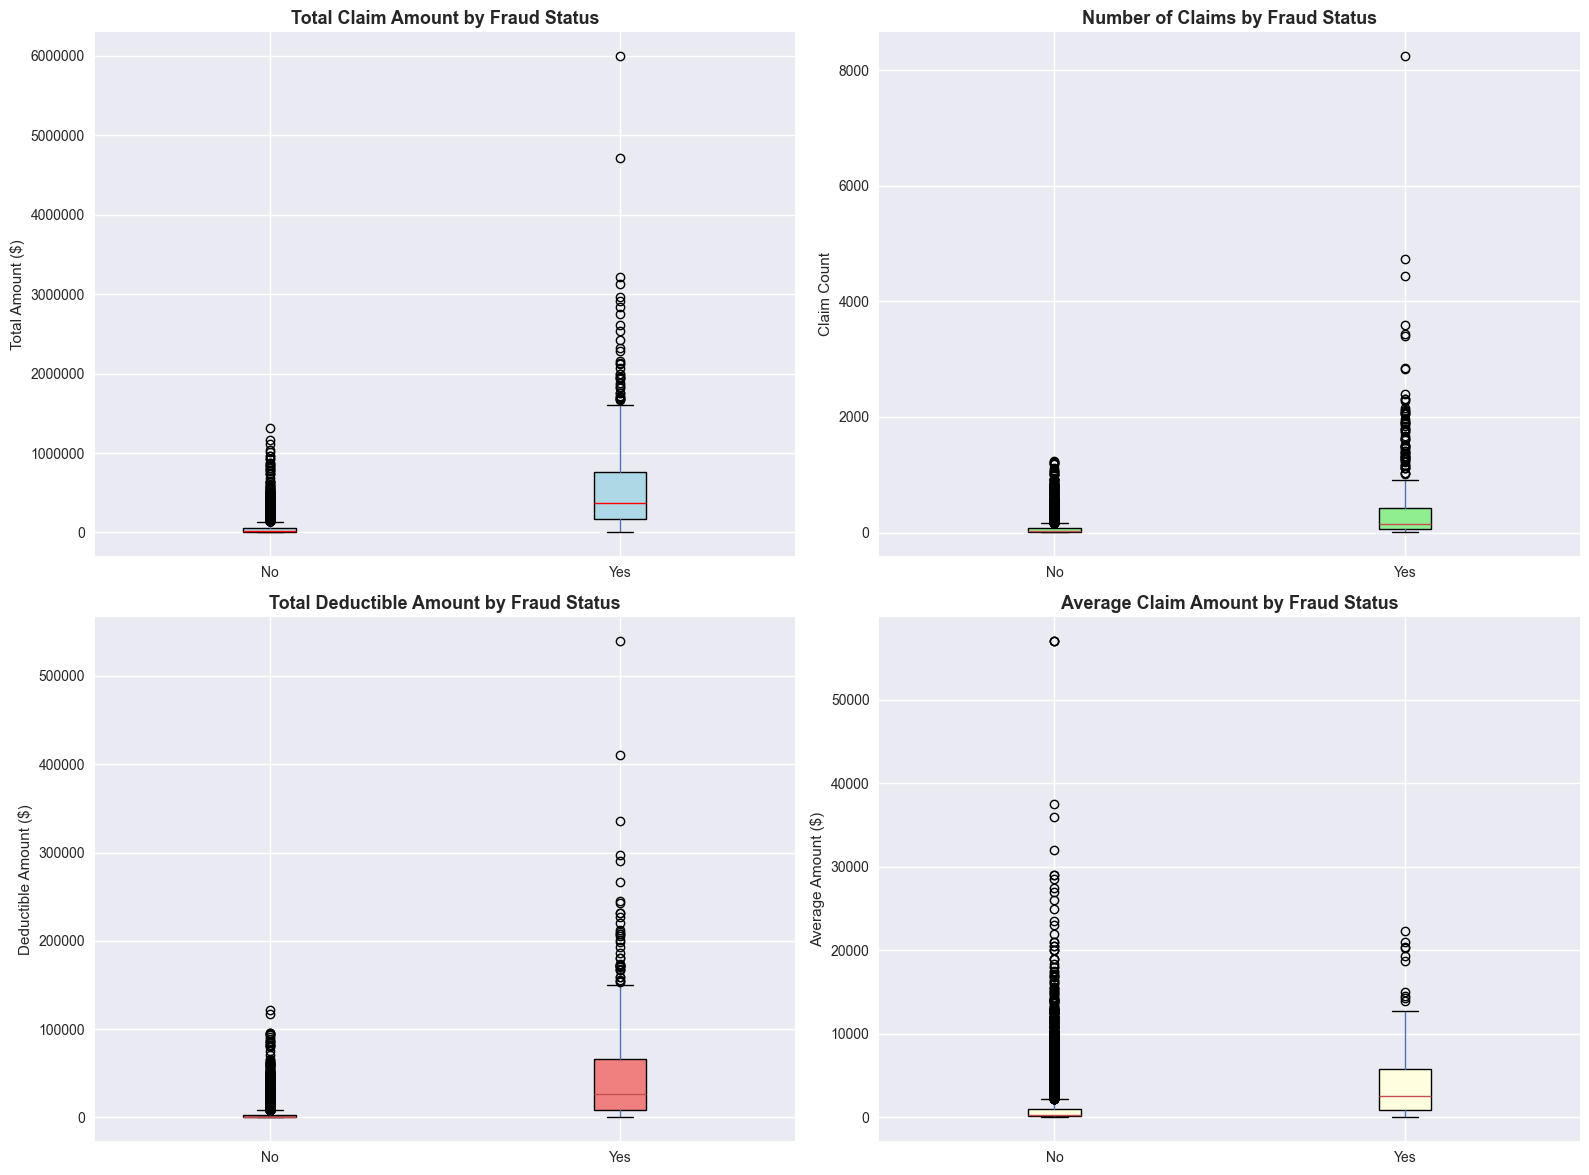

DIAGNOSIS & PROCEDURE CODE ANALYSIS

Found 12 diagnosis code columns

ClmAdmitDiagnosisCode:
  • Fraud providers: 79.8 unique codes on average
  • Non-fraud providers: 14.7 unique codes on average
  • Ratio: 5.41x more unique codes for fraud

DiagnosisGroupCode:
  • Fraud providers: 41.4 unique codes on average
  • Non-fraud providers: 3.4 unique codes on average
  • Ratio: 12.23x more unique codes for fraud

ClmDiagnosisCode_1:
  • Fraud providers: 286.7 unique codes on average
  • Non-fraud providers: 60.4 unique codes on average
  • Ratio: 4.75x more unique codes for fraud
CORRELATION ANALYSIS

Top 10 Features Correlated with Fraud:
 2. InscClaimAmtReimbursed_sum               : +0.5756
 3. DeductibleAmtPaid_sum                    : +0.5321
 4. InscClaimAmtReimbursed_count             : +0.3742
 5. InscClaimAmtReimbursed_std               : +0.3431
 6. DeductibleAmtPaid_mean                   : +0.2046
 7. InscClaimAmtReimbursed_mean              : +0.1938

Bottom 10 Features Correl

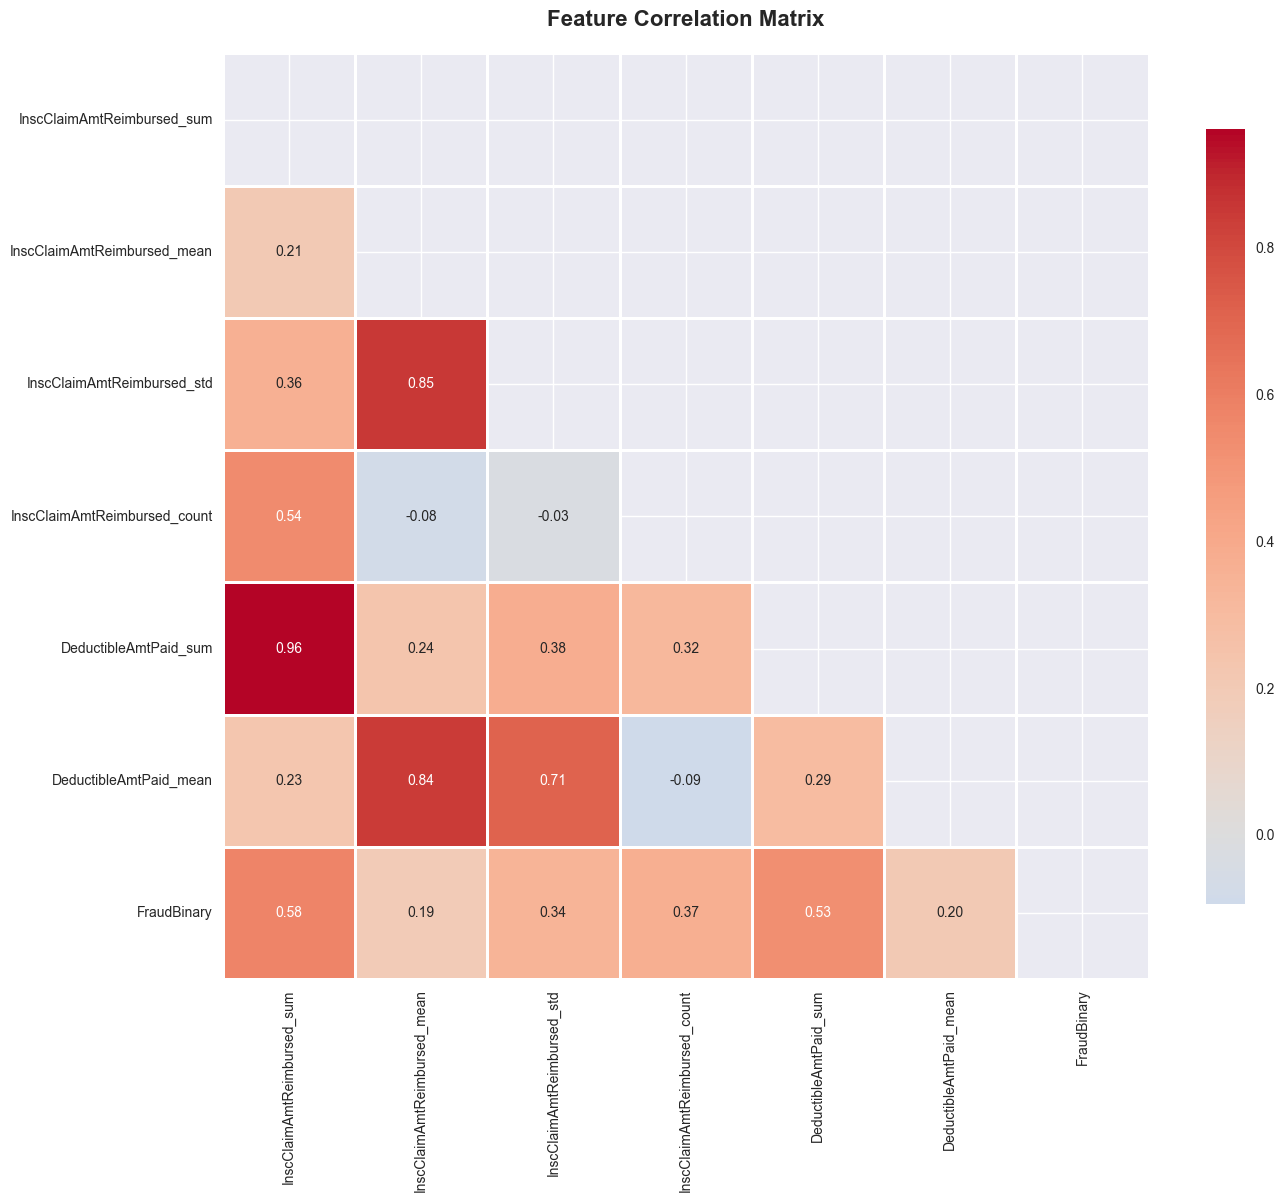

OUTLIER DETECTION

InscClaimAmtReimbursed_sum:
  • Outliers (z-score > 3): 103 providers
  • Percentage: 1.90%

InscClaimAmtReimbursed_mean:
  • Outliers (z-score > 3): 109 providers
  • Percentage: 2.01%

DeductibleAmtPaid_sum:
  • Outliers (z-score > 3): 109 providers
  • Percentage: 2.01%


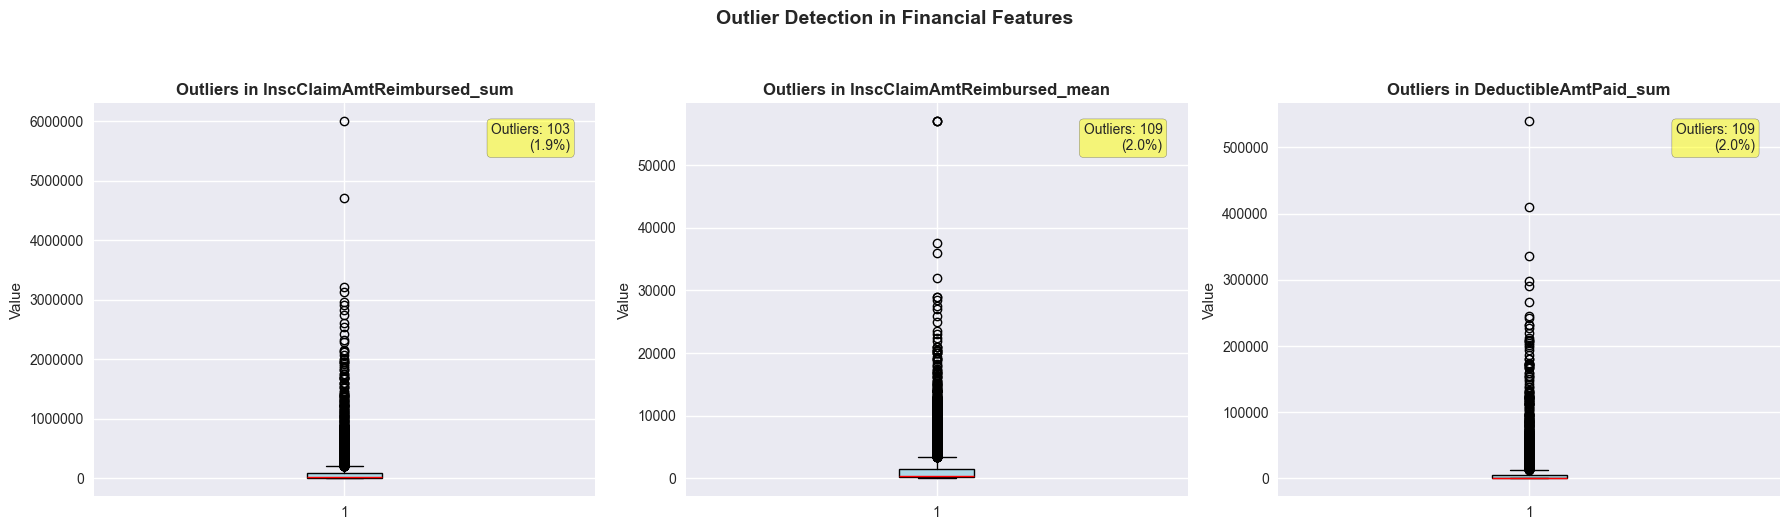

SUMMARY STATISTICS

Summary Statistics by Fraud Status:
--------------------------------------------------------------------------------
               InscClaimAmtReimbursed_sum                                     \
                                     mean    median        std  min      max   
PotentialFraud                                                                 
No                               53193.72   15055.0  102342.35    0  1311040   
Yes                             584350.04  373450.0  644668.51  200  5996050   

               InscClaimAmtReimbursed_count        DeductibleAmtPaid_sum  \
                                       mean median                  mean   
PotentialFraud                                                             
No                                    70.44   27.0               3819.07   
Yes                                  420.55  155.5              49360.22   

                         
                 median  
PotentialFraud           
No 

In [39]:
print("Checking for Duplicate Records:")

print(f"Duplicate beneficiaries: {beneficiary.duplicated().sum()}")
print(f"Duplicate inpatient claims: {inpatient.duplicated().sum()}")
print(f"Duplicate outpatient claims: {outpatient.duplicated().sum()}")
print(f"Duplicate provider labels: {labels.duplicated().sum()}")

# 1. TARGET VARIABLE VISUALIZATION
print("Fraud vs Non-Fraud Providers:")
print(labels['PotentialFraud'].value_counts())
print("\nPercentage:")
print(labels['PotentialFraud'].value_counts(normalize=True) * 100)

# Enhanced visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot with percentages
counts = labels['PotentialFraud'].value_counts()
colors = ['lightblue', 'red']
bars = ax1.bar(['Non-Fraud', 'Fraud'], counts, color=colors, edgecolor='black')
ax1.set_title('Fraud vs Non-Fraud Providers', fontsize=14, fontweight='bold')
ax1.set_xlabel('Provider Type', fontsize=12)
ax1.set_ylabel('Number of Providers', fontsize=12)
ax1.grid(axis='y', alpha=0.3)

# Add counts on top of bars
for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 20,
             f'{count:,}\n({count/len(labels)*100:.1f}%)',
             ha='center', va='bottom', fontsize=11)

# Pie chart
labels_pie = ['Non-Fraud (90.6%)', 'Fraud (9.4%)']
ax2.pie(counts, labels=labels_pie, colors=colors, autopct='%1.1f%%',
        startangle=90, explode=(0, 0.1), shadow=True)
ax2.set_title('Class Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# 2. TEMPORAL ANALYSIS - CLAIM TRENDS OVER TIME
print("TEMPORAL ANALYSIS - CLAIM TRENDS")

# Convert date columns
all_claims = pd.concat([inpatient, outpatient], ignore_index=True)
all_claims['ClaimStartDt'] = pd.to_datetime(all_claims['ClaimStartDt'])
all_claims['ClaimEndDt'] = pd.to_datetime(all_claims['ClaimEndDt'])

# Monthly trends
all_claims['ClaimMonth'] = all_claims['ClaimStartDt'].dt.to_period('M').astype(str)
monthly_claims = all_claims.groupby('ClaimMonth').agg({
    'InscClaimAmtReimbursed': ['sum', 'count'],
    'ClaimID': 'nunique'
}).round(2)

monthly_claims.columns = ['Total_Amount', 'Total_Claims', 'Unique_Claims']
monthly_claims = monthly_claims.reset_index()

# Visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Total Claim Amount Over Time
ax1.plot(monthly_claims['ClaimMonth'], monthly_claims['Total_Amount'], 
         marker='o', linewidth=2, color='steelblue')
ax1.set_title('Total Claim Amount by Month', fontsize=14, fontweight='bold')
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Total Amount ($)', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Number of Claims Over Time
ax2.plot(monthly_claims['ClaimMonth'], monthly_claims['Total_Claims'], 
         marker='s', linewidth=2, color='coral')
ax2.set_title('Number of Claims by Month', fontsize=14, fontweight='bold')
ax2.set_xlabel('Month', fontsize=12)
ax2.set_ylabel('Number of Claims', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# 3. GEOGRAPHIC ANALYSIS
print("GEOGRAPHIC ANALYSIS")

# Merge beneficiary state with provider fraud labels
beneficiary_provider = all_claims[['BeneID', 'Provider']].drop_duplicates().merge(
    beneficiary[['BeneID', 'State']], on='BeneID', how='left'
)

# Get most common state for each provider
provider_state = beneficiary_provider.groupby('Provider')['State'].agg(
    lambda x: x.mode()[0] if len(x.mode()) > 0 else None
).reset_index()

# Merge with fraud labels
fraud_by_state = provider_state.merge(labels, on='Provider', how='left')
state_fraud_stats = fraud_by_state.groupby('State').agg({
    'Provider': 'count',
    'PotentialFraud': lambda x: (x == 'Yes').mean()
}).round(4)

state_fraud_stats.columns = ['Provider_Count', 'Fraud_Rate']
state_fraud_stats = state_fraud_stats.sort_values('Fraud_Rate', ascending=False)

print("\nTop 10 States by Fraud Rate:")
print(state_fraud_stats.head(10))

print("\nBottom 10 States by Fraud Rate:")
print(state_fraud_stats.tail(10))

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart - Top 15 states by fraud rate
top_states = state_fraud_stats.head(15)
colors = plt.cm.RdYlGn_r(top_states['Fraud_Rate'] / top_states['Fraud_Rate'].max())
bars = ax1.barh(top_states.index.astype(str), top_states['Fraud_Rate'], color=colors, edgecolor='black')
ax1.set_title('Top 15 States by Fraud Rate', fontsize=14, fontweight='bold')
ax1.set_xlabel('Fraud Rate (%)', fontsize=12)
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)

# Add percentage labels
for bar, rate in zip(bars, top_states['Fraud_Rate']):
    ax1.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
             f'{rate*100:.1f}%', va='center', fontsize=10)

# Scatter plot: Provider Count vs Fraud Rate
ax2.scatter(state_fraud_stats['Provider_Count'], state_fraud_stats['Fraud_Rate']*100,
            alpha=0.6, s=50, color='purple', edgecolor='black')
ax2.set_title('Provider Count vs Fraud Rate by State', fontsize=14, fontweight='bold')
ax2.set_xlabel('Number of Providers', fontsize=12)
ax2.set_ylabel('Fraud Rate (%)', fontsize=12)
ax2.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(state_fraud_stats['Provider_Count'], state_fraud_stats['Fraud_Rate']*100, 1)
p = np.poly1d(z)
ax2.plot(state_fraud_stats['Provider_Count'], p(state_fraud_stats['Provider_Count']),
         "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()


# 4. PROVIDER-LEVEL FEATURE COMPARISON (FRAUD vs NON-FRAUD)
print("DETAILED FRAUD vs NON-FRAUD COMPARISON")

# Create provider features (from your existing code)
all_claims['ClaimType'] = 'Inpatient'
outpatient['ClaimType'] = 'Outpatient'
all_claims = pd.concat([inpatient, outpatient], ignore_index=True)

provider_financials = all_claims.groupby('Provider').agg({
    'InscClaimAmtReimbursed': ['sum', 'mean', 'std', 'count'],
    'DeductibleAmtPaid': ['sum', 'mean']
}).round(2)
provider_financials.columns = ['_'.join(col).strip() for col in provider_financials.columns.values]
provider_financials = provider_financials.reset_index()

# Merge with labels
provider_features = labels.merge(provider_financials, on='Provider', how='left')
provider_features['FraudBinary'] = (provider_features['PotentialFraud'] == 'Yes').astype(int)

# Statistical comparison
print("\nStatistical Comparison of Key Metrics (Fraud vs Non-Fraud):")

comparison_metrics = [
    'InscClaimAmtReimbursed_sum',
    'InscClaimAmtReimbursed_mean', 
    'InscClaimAmtReimbursed_count',
    'DeductibleAmtPaid_sum'
]

comparison_results = []
for metric in comparison_metrics:
    fraud_vals = provider_features.loc[provider_features['FraudBinary'] == 1, metric].dropna()
    non_fraud_vals = provider_features.loc[provider_features['FraudBinary'] == 0, metric].dropna()
    
    if len(fraud_vals) > 1 and len(non_fraud_vals) > 1:
        t_stat, p_val = ttest_ind(fraud_vals, non_fraud_vals, equal_var=False)
        
        comparison_results.append({
            'Metric': metric,
            'Fraud_Mean': fraud_vals.mean(),
            'NonFraud_Mean': non_fraud_vals.mean(),
            'Ratio': fraud_vals.mean() / non_fraud_vals.mean(),
            'T-Statistic': t_stat,
            'P-Value': p_val,
            'Significant': p_val < 0.05
        })

comparison_df = pd.DataFrame(comparison_results)
print(comparison_df.to_string(index=False))


# 5. VISUAL COMPARISON - DISTRIBUTION PLOTS

print("VISUAL DISTRIBUTION COMPARISON")


# Select key features for visualization
key_features = [
    'InscClaimAmtReimbursed_sum',
    'InscClaimAmtReimbursed_count',
    'DeductibleAmtPaid_sum',
    'InscClaimAmtReimbursed_mean'
]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, feature in enumerate(key_features):
    ax = axes[idx]
    
    # Split data
    fraud_data = provider_features.loc[provider_features['FraudBinary'] == 1, feature].dropna()
    non_fraud_data = provider_features.loc[provider_features['FraudBinary'] == 0, feature].dropna()
    
    # Remove extreme outliers for better visualization
    fraud_clean = fraud_data[fraud_data <= fraud_data.quantile(0.95)]
    non_fraud_clean = non_fraud_data[non_fraud_data <= non_fraud_data.quantile(0.95)]
    
    # KDE plot
    sns.kdeplot(fraud_clean, label='Fraud', ax=ax, color='red', fill=True, alpha=0.5)
    sns.kdeplot(non_fraud_clean, label='Non-Fraud', ax=ax, color='blue', fill=True, alpha=0.5)
    
    # Add vertical lines for means
    ax.axvline(fraud_clean.mean(), color='red', linestyle='--', linewidth=2, alpha=0.8)
    ax.axvline(non_fraud_clean.mean(), color='blue', linestyle='--', linewidth=2, alpha=0.8)
    
    ax.set_title(f'Distribution of {feature}', fontsize=13, fontweight='bold')
    ax.set_xlabel(feature.replace('_', ' ').title(), fontsize=11)
    ax.set_ylabel('Density', fontsize=11)
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Add text with statistics
    stats_text = f"Fraud Mean: ${fraud_clean.mean():,.0f}\nNon-Fraud Mean: ${non_fraud_clean.mean():,.0f}"
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
            verticalalignment='top', fontsize=10,
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle('Distribution Comparison: Fraud vs Non-Fraud Providers', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# 6. BOX PLOT COMPARISON


print("BOX PLOT COMPARISON")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Total Claim Amount
provider_features.boxplot(column='InscClaimAmtReimbursed_sum', by='PotentialFraud', 
                         ax=axes[0,0], patch_artist=True,
                         boxprops=dict(facecolor='lightblue'),
                         medianprops=dict(color='red'))
axes[0,0].set_title('Total Claim Amount by Fraud Status', fontsize=13, fontweight='bold')
axes[0,0].set_ylabel('Total Amount ($)')
axes[0,0].set_xlabel('')
axes[0,0].ticklabel_format(style='plain', axis='y')

# Plot 2: Number of Claims
provider_features.boxplot(column='InscClaimAmtReimbursed_count', by='PotentialFraud', 
                         ax=axes[0,1], patch_artist=True,
                         boxprops=dict(facecolor='lightgreen'))
axes[0,1].set_title('Number of Claims by Fraud Status', fontsize=13, fontweight='bold')
axes[0,1].set_ylabel('Claim Count')
axes[0,1].set_xlabel('')

# Plot 3: Deductible Amount
provider_features.boxplot(column='DeductibleAmtPaid_sum', by='PotentialFraud', 
                         ax=axes[1,0], patch_artist=True,
                         boxprops=dict(facecolor='lightcoral'))
axes[1,0].set_title('Total Deductible Amount by Fraud Status', fontsize=13, fontweight='bold')
axes[1,0].set_ylabel('Deductible Amount ($)')
axes[1,0].set_xlabel('')
axes[1,0].ticklabel_format(style='plain', axis='y')

# Plot 4: Average Claim Amount
provider_features.boxplot(column='InscClaimAmtReimbursed_mean', by='PotentialFraud', 
                         ax=axes[1,1], patch_artist=True,
                         boxprops=dict(facecolor='lightyellow'))
axes[1,1].set_title('Average Claim Amount by Fraud Status', fontsize=13, fontweight='bold')
axes[1,1].set_ylabel('Average Amount ($)')
axes[1,1].set_xlabel('')

plt.suptitle('')  # Remove default title
plt.tight_layout()
plt.show()

# 7. DIAGNOSIS/PROCEDURE CODE ANALYSIS

print("DIAGNOSIS & PROCEDURE CODE ANALYSIS")


# Combine claims with fraud labels
all_claims_with_fraud = all_claims.merge(labels, on='Provider', how='left')
all_claims_with_fraud['IsFraud'] = (all_claims_with_fraud['PotentialFraud'] == 'Yes')

# Analyze diagnosis code patterns
diagnosis_cols = [col for col in all_claims.columns if 'Diagnosis' in col]
print(f"\nFound {len(diagnosis_cols)} diagnosis code columns")

# Get unique diagnosis codes per provider
for col in diagnosis_cols[:3]:  # First 3 diagnosis columns
    unique_diag = all_claims_with_fraud.groupby(['Provider', 'IsFraud'])[col].nunique().reset_index()
    
    # Compare fraud vs non-fraud
    fraud_unique = unique_diag[unique_diag['IsFraud'] == True][col].mean()
    non_fraud_unique = unique_diag[unique_diag['IsFraud'] == False][col].mean()
    
    print(f"\n{col}:")
    print(f"  • Fraud providers: {fraud_unique:.1f} unique codes on average")
    print(f"  • Non-fraud providers: {non_fraud_unique:.1f} unique codes on average")
    print(f"  • Ratio: {fraud_unique/non_fraud_unique:.2f}x more unique codes for fraud")


# 8. CORRELATION HEATMAP

print("CORRELATION ANALYSIS")

# Select numeric features for correlation
numeric_features = provider_features.select_dtypes(include=[np.number])
correlation_matrix = numeric_features.corr()

# Focus on correlation with fraud
fraud_correlations = correlation_matrix['FraudBinary'].sort_values(ascending=False)

print("\nTop 10 Features Correlated with Fraud:")
for idx, (feature, corr) in enumerate(fraud_correlations.head(11).items(), 1):
    if feature != 'FraudBinary':
        print(f"{idx:2d}. {feature:40} : {corr:+.4f}")

print("\nBottom 10 Features Correlated with Fraud:")
for idx, (feature, corr) in enumerate(fraud_correlations.tail(10).items(), 1):
    print(f"{idx:2d}. {feature:40} : {corr:+.4f}")

# Heatmap visualization
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
           cmap='coolwarm', center=0, square=True, linewidths=1,
           cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# 9. OUTLIER DETECTION

print("OUTLIER DETECTION")

# Calculate Z-scores for key financial features
key_financial_features = [
    'InscClaimAmtReimbursed_sum',
    'InscClaimAmtReimbursed_mean',
    'DeductibleAmtPaid_sum'
]

outlier_results = {}
for feature in key_financial_features:
    z_scores = np.abs(stats.zscore(provider_features[feature].fillna(0)))
    outliers = (z_scores > 3).sum()
    outlier_percentage = (outliers / len(provider_features)) * 100
    
    outlier_results[feature] = {
        'outliers': outliers,
        'percentage': outlier_percentage
    }
    
    print(f"\n{feature}:")
    print(f"  • Outliers (z-score > 3): {outliers:,} providers")
    print(f"  • Percentage: {outlier_percentage:.2f}%")

# Visualize outliers
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, feature in enumerate(key_financial_features):
    ax = axes[idx]
    
    # Box plot
    box = ax.boxplot(provider_features[feature].dropna(), patch_artist=True)
    box['boxes'][0].set_facecolor('lightblue')
    box['medians'][0].set_color('red')
    
    ax.set_title(f'Outliers in {feature}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Value')
    ax.ticklabel_format(style='plain', axis='y')
    
    # Add outlier count
    outliers = outlier_results[feature]['outliers']
    ax.text(0.95, 0.95, f'Outliers: {outliers}\n({outlier_results[feature]["percentage"]:.1f}%)',
            transform=ax.transAxes, ha='right', va='top',
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

plt.suptitle('Outlier Detection in Financial Features', fontsize=14, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

# 10. SUMMARY STATISTICS


print("SUMMARY STATISTICS")


# Create summary table
summary_stats = provider_features.groupby('PotentialFraud').agg({
    'InscClaimAmtReimbursed_sum': ['mean', 'median', 'std', 'min', 'max'],
    'InscClaimAmtReimbursed_count': ['mean', 'median'],
    'DeductibleAmtPaid_sum': ['mean', 'median']
}).round(2)

print("\nSummary Statistics by Fraud Status:")
print("-" * 80)
print(summary_stats)

# Calculate differences
print("\nKey Differences (Fraud vs Non-Fraud):")
print("-" * 40)
for col in ['InscClaimAmtReimbursed_sum', 'InscClaimAmtReimbursed_count', 'DeductibleAmtPaid_sum']:
    fraud_mean = provider_features[provider_features['PotentialFraud'] == 'Yes'][col].mean()
    non_fraud_mean = provider_features[provider_features['PotentialFraud'] == 'No'][col].mean()
    ratio = fraud_mean / non_fraud_mean
    print(f"{col:30} : Fraud=${fraud_mean:,.0f} vs Non-Fraud=${non_fraud_mean:,.0f} (Ratio: {ratio:.2f}x)")



In [40]:
print("Starting Feature Engineering - Provider Level Aggregation")

# 1. Combine inpatient and outpatient claims
inpatient['ClaimType'] = 'Inpatient'
outpatient['ClaimType'] = 'Outpatient'

# Combine all claims
all_claims = pd.concat([inpatient, outpatient], ignore_index=True)
print(f"Total claims: {len(all_claims)}")

# 2. Aggregate financial metrics by provider
provider_financials = all_claims.groupby('Provider').agg({
    'InscClaimAmtReimbursed': ['sum', 'mean', 'std', 'count'],
    'DeductibleAmtPaid': ['sum', 'mean']
}).round(2)

# Flatten column names
provider_financials.columns = ['_'.join(col).strip() for col in provider_financials.columns.values]
provider_financials = provider_financials.reset_index()
print(f"Provider financials shape: {provider_financials.shape}")

# 3. Aggregate by provider and claim type
provider_claim_types = all_claims.groupby(['Provider', 'ClaimType']).size().unstack(fill_value=0)
provider_claim_types = provider_claim_types.reset_index()
print(f"Provider claim types shape: {provider_claim_types.shape}")

# 4. Count unique physicians per provider
physician_counts = all_claims.groupby('Provider').agg({
    'AttendingPhysician': 'nunique',
    'OperatingPhysician': 'nunique', 
    'OtherPhysician': 'nunique'
}).reset_index()
physician_counts.columns = ['Provider', 'UniqueAttendingPhysicians', 'UniqueOperatingPhysicians', 'UniqueOtherPhysicians']
print(f"Physician counts shape: {physician_counts.shape}")

# 5. Merge everything with fraud labels
provider_features = labels.merge(provider_financials, on='Provider', how='left')
provider_features = provider_features.merge(provider_claim_types, on='Provider', how='left')
provider_features = provider_features.merge(physician_counts, on='Provider', how='left')

print(f"Final provider features shape: {provider_features.shape}")
print("\nFirst 3 rows of provider features:")
display(provider_features.head(3))

Starting Feature Engineering - Provider Level Aggregation
Total claims: 558211
Provider financials shape: (5410, 7)
Provider claim types shape: (5410, 3)
Physician counts shape: (5410, 4)
Final provider features shape: (5410, 13)

First 3 rows of provider features:


,Provider,PotentialFraud,InscClaimAmtReimbursed_sum,InscClaimAmtReimbursed_mean,InscClaimAmtReimbursed_std,InscClaimAmtReimbursed_count,DeductibleAmtPaid_sum,DeductibleAmtPaid_mean,Inpatient,Outpatient,UniqueAttendingPhysicians,UniqueOperatingPhysicians,UniqueOtherPhysicians
0,PRV51001,No,104640,4185.60,10796.09,25,5340.0,213.60,5,20,14,5,8
1,PRV51003,Yes,605670,4588.41,7309.79,132,66286.0,502.17,62,70,44,7,22
2,PRV51004,No,52170,350.13,689.96,149,310.0,2.08,0,149,38,19,26


In [41]:
print(" Final Dataset Info:")
print(provider_features.info())
print(f"\nMissing values in final dataset: {provider_features.isnull().sum().sum()}")

print("\n Fraud vs Non-Fraud in final dataset:")
print(provider_features['PotentialFraud'].value_counts())

 Final Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Provider                      5410 non-null   object 
 1   PotentialFraud                5410 non-null   object 
 2   InscClaimAmtReimbursed_sum    5410 non-null   int64  
 3   InscClaimAmtReimbursed_mean   5410 non-null   float64
 4   InscClaimAmtReimbursed_std    5170 non-null   float64
 5   InscClaimAmtReimbursed_count  5410 non-null   int64  
 6   DeductibleAmtPaid_sum         5410 non-null   float64
 7   DeductibleAmtPaid_mean        5409 non-null   float64
 8   Inpatient                     5410 non-null   int64  
 9   Outpatient                    5410 non-null   int64  
 10  UniqueAttendingPhysicians     5410 non-null   int64  
 11  UniqueOperatingPhysicians     5410 non-null   int64  
 12  UniqueOtherPhysicians         5410 non-nu

In [42]:
print(" Comparing Fraudulent vs Legitimate Providers:")

# Convert target to binary for analysis
provider_features['FraudBinary'] = (provider_features['PotentialFraud'] == 'Yes').astype(int)

# Group by fraud status and calculate mean values
fraud_comparison = provider_features.groupby('PotentialFraud').mean(numeric_only=True).round(2)

print(" Average Values by Fraud Status:")
display(fraud_comparison.T)  # Transpose for better readability

 Comparing Fraudulent vs Legitimate Providers:
 Average Values by Fraud Status:


PotentialFraud,No,Yes
InscClaimAmtReimbursed_sum,53193.72,584350.04
InscClaimAmtReimbursed_mean,1523.78,3842.79
InscClaimAmtReimbursed_std,2119.50,6389.40
InscClaimAmtReimbursed_count,70.44,420.55
DeductibleAmtPaid_sum,3819.07,49360.22
DeductibleAmtPaid_mean,135.50,350.84
Inpatient,3.48,46.25
Outpatient,66.95,374.30
UniqueAttendingPhysicians,13.68,41.11
UniqueOperatingPhysicians,5.49,19.29


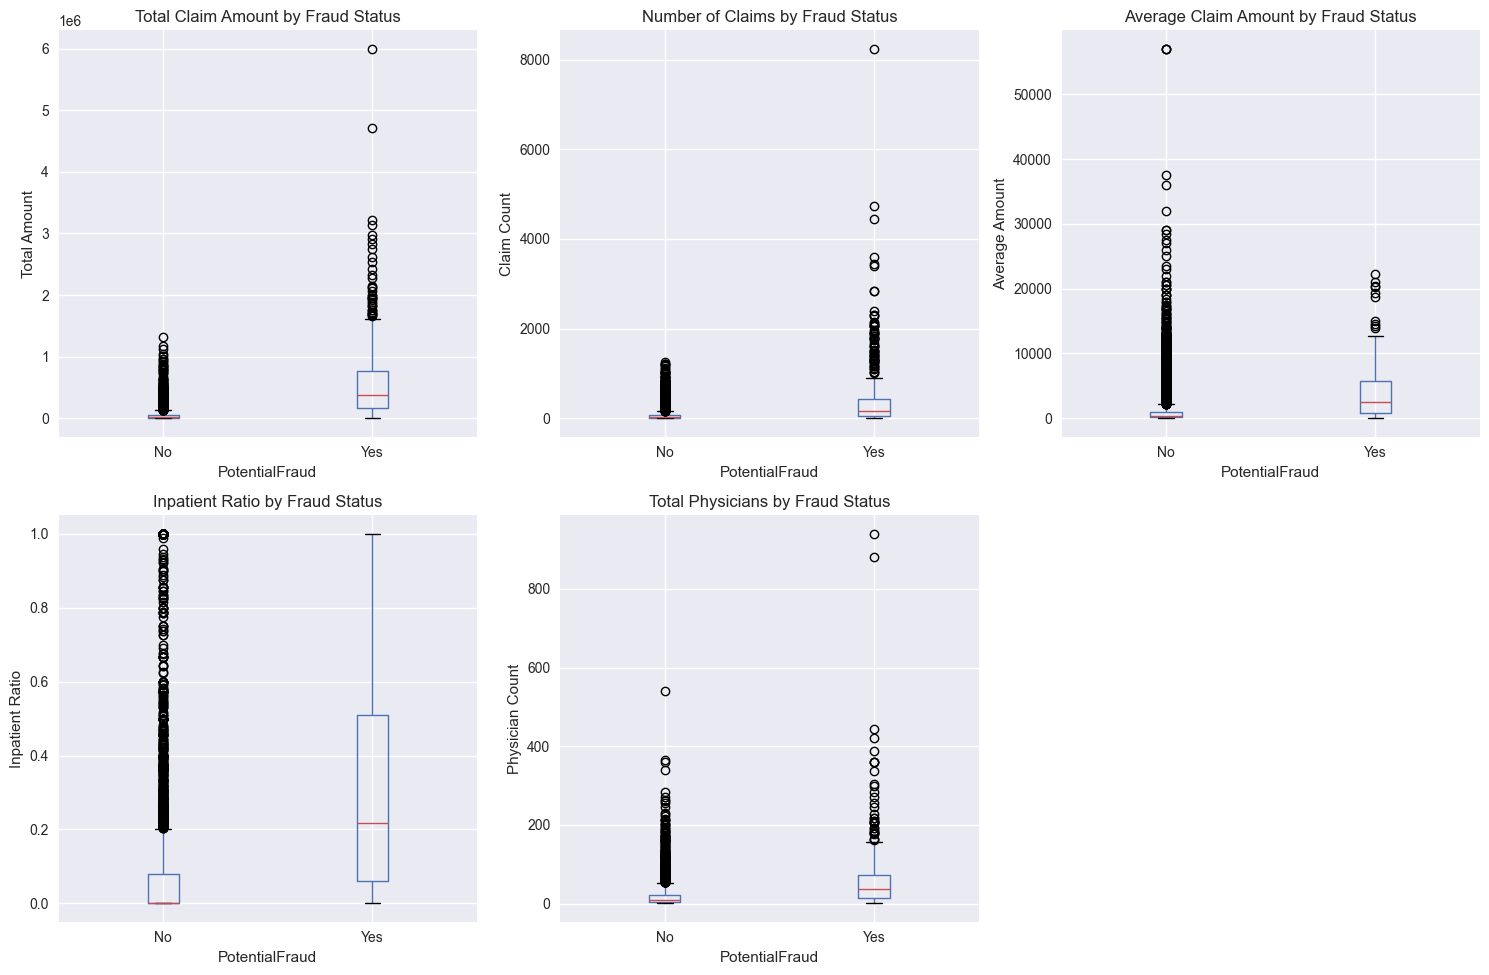

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot 1: Total Claim Amount
provider_features.boxplot(column='InscClaimAmtReimbursed_sum', by='PotentialFraud', ax=axes[0,0])
axes[0,0].set_title('Total Claim Amount by Fraud Status')
axes[0,0].set_ylabel('Total Amount')

# Plot 2: Number of Claims
provider_features.boxplot(column='InscClaimAmtReimbursed_count', by='PotentialFraud', ax=axes[0,1])
axes[0,1].set_title('Number of Claims by Fraud Status')
axes[0,1].set_ylabel('Claim Count')

# Plot 3: Average Claim Amount
provider_features.boxplot(column='InscClaimAmtReimbursed_mean', by='PotentialFraud', ax=axes[0,2])
axes[0,2].set_title('Average Claim Amount by Fraud Status')
axes[0,2].set_ylabel('Average Amount')

# Plot 4: Inpatient vs Outpatient Ratio
provider_features['Inpatient_Ratio'] = provider_features['Inpatient'] / (provider_features['Inpatient'] + provider_features['Outpatient'])
provider_features.boxplot(column='Inpatient_Ratio', by='PotentialFraud', ax=axes[1,0])
axes[1,0].set_title('Inpatient Ratio by Fraud Status')
axes[1,0].set_ylabel('Inpatient Ratio')

# Plot 5: Unique Physicians
provider_features['Total_Physicians'] = provider_features['UniqueAttendingPhysicians'] + provider_features['UniqueOperatingPhysicians']
provider_features.boxplot(column='Total_Physicians', by='PotentialFraud', ax=axes[1,1])
axes[1,1].set_title('Total Physicians by Fraud Status')
axes[1,1].set_ylabel('Physician Count')

# Hide empty subplot
axes[1,2].set_visible(False)

plt.suptitle('')  # Remove automatic title
plt.tight_layout()
plt.show()

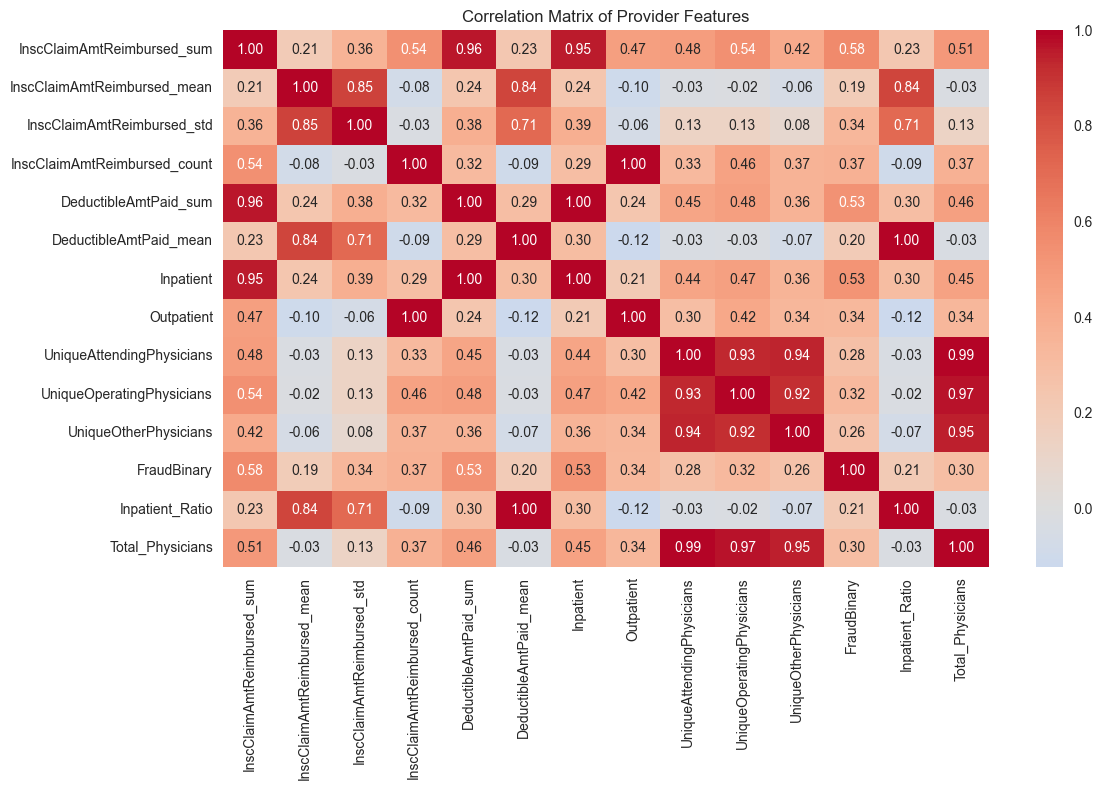

 Correlation with Fraud Target:
FraudBinary                     1.000000
InscClaimAmtReimbursed_sum      0.575558
DeductibleAmtPaid_sum           0.532070
Inpatient                       0.525393
InscClaimAmtReimbursed_count    0.374197
InscClaimAmtReimbursed_std      0.343145
Outpatient                      0.335803
UniqueOperatingPhysicians       0.324408
Total_Physicians                0.295259
UniqueAttendingPhysicians       0.276772
UniqueOtherPhysicians           0.261695
Inpatient_Ratio                 0.205683
DeductibleAmtPaid_mean          0.204616
InscClaimAmtReimbursed_mean     0.193803
Name: FraudBinary, dtype: float64


In [44]:
# Select numeric columns for correlation
numeric_cols = provider_features.select_dtypes(include=[np.number]).columns
correlation_matrix = provider_features[numeric_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Provider Features')
plt.tight_layout()
plt.show()

# Show correlation with fraud target
print(" Correlation with Fraud Target:")
fraud_correlations = correlation_matrix['FraudBinary'].sort_values(ascending=False)
print(fraud_correlations)

In [45]:
print(" Adding Beneficiary Features to Provider Analysis")

# 1. Link beneficiaries to their claims to get provider information
beneficiary_claims = all_claims[['BeneID', 'Provider']].drop_duplicates()

# 2. Merge beneficiary data with provider information
beneficiary_provider = beneficiary_claims.merge(beneficiary, on='BeneID', how='left')

# 3. Aggregate beneficiary features by provider
provider_beneficiary_features = beneficiary_provider.groupby('Provider').agg({
    'Gender': lambda x: (x == 1).mean(),  # Percentage male
    'Race': 'nunique',                    # Diversity of races
    'State': 'nunique',                   # Geographic spread
    'RenalDiseaseIndicator': lambda x: (x == 'Y').mean(),  # Chronic condition rates
    'ChronicCond_Alzheimer': 'mean',
    'ChronicCond_Heartfailure': 'mean', 
    'ChronicCond_KidneyDisease': 'mean',
    'ChronicCond_Cancer': 'mean',
    'ChronicCond_Depression': 'mean',
    'ChronicCond_Diabetes': 'mean',
    'IPAnnualReimbursementAmt': 'mean',
    'OPAnnualReimbursementAmt': 'mean'
}).round(4)

# Rename columns for clarity
provider_beneficiary_features.columns = [
    'Pct_Male', 'Unique_Races', 'Unique_States', 'Pct_RenalDisease',
    'Pct_Alzheimer', 'Pct_Heartfailure', 'Pct_KidneyDisease', 'Pct_Cancer',
    'Pct_Depression', 'Pct_Diabetes', 'Avg_IPAnnualReimbursement', 'Avg_OPAnnualReimbursement'
]

print(f"Beneficiary features shape: {provider_beneficiary_features.shape}")

 Adding Beneficiary Features to Provider Analysis
Beneficiary features shape: (5410, 12)


In [46]:
print("Step 1: Handling Missing Values and Data Preparation")

# Create cleaned version of our provider features
provider_features_clean = provider_features.copy()

# Fill missing values
provider_features_clean['InscClaimAmtReimbursed_std'] = provider_features_clean['InscClaimAmtReimbursed_std'].fillna(0)
provider_features_clean['DeductibleAmtPaid_mean'] = provider_features_clean['DeductibleAmtPaid_mean'].fillna(
    provider_features_clean['DeductibleAmtPaid_mean'].mean()
)

print(f"Missing values after cleaning: {provider_features_clean.isnull().sum().sum()}")

print("\n Step 2: Creating Additional Features")

# Create additional useful features
provider_features_clean['Amount_Per_Physician'] = (
    provider_features_clean['InscClaimAmtReimbursed_sum'] / 
    provider_features_clean['Total_Physicians']
).replace([np.inf, -np.inf], 0)

provider_features_clean['Inpatient_Outpatient_Ratio'] = (
    provider_features_clean['Inpatient'] / 
    (provider_features_clean['Outpatient'] + 1)
)

provider_features_clean['Deductible_Ratio'] = (
    provider_features_clean['DeductibleAmtPaid_sum'] / 
    (provider_features_clean['InscClaimAmtReimbursed_sum'] + 1)
)

print(" Step 3: Adding Beneficiary Features")

# Aggregate beneficiary features by provider
beneficiary_claims = all_claims[['BeneID', 'Provider']].drop_duplicates()
beneficiary_provider = beneficiary_claims.merge(beneficiary, on='BeneID', how='left')

provider_beneficiary_features = beneficiary_provider.groupby('Provider').agg({
    'Gender': lambda x: (x == 1).mean(),
    'Race': 'nunique',
    'State': 'nunique',
    'RenalDiseaseIndicator': lambda x: (x == 'Y').mean(),
    'ChronicCond_Alzheimer': 'mean',
    'ChronicCond_Heartfailure': 'mean', 
    'ChronicCond_Diabetes': 'mean'
}).round(4)

provider_beneficiary_features.columns = [
    'Pct_Male', 'Unique_Races', 'Unique_States', 'Pct_RenalDisease',
    'Pct_Alzheimer', 'Pct_Heartfailure', 'Pct_Diabetes'
]

print(" Step 4: Creating Final Feature Set")

# Merge everything
final_features = provider_features_clean.merge(
    provider_beneficiary_features, on='Provider', how='left'
)

print(f" Final dataset shape: {final_features.shape}")
print(f" Total features: {len(final_features.columns)}")
print(f" Missing values: {final_features.isnull().sum().sum()}")

Step 1: Handling Missing Values and Data Preparation
Missing values after cleaning: 0

 Step 2: Creating Additional Features
 Step 3: Adding Beneficiary Features
 Step 4: Creating Final Feature Set
 Final dataset shape: (5410, 26)
 Total features: 26
 Missing values: 0


In [47]:
import os



# Create the processed folder if it doesn't exist
processed_dir = '../Data/processed'
os.makedirs(processed_dir, exist_ok=True)


# Save the final datasets
final_features.to_csv('../Data/processed/provider_features_final.csv', index=False)


# Save modeling version (without IDs and target)
modeling_features = final_features.drop(['Provider', 'PotentialFraud'], axis=1)
modeling_features.to_csv('../Data/processed/features_for_modeling.csv', index=False)


# Also save the target labels separately
labels_to_save = final_features[['Provider', 'PotentialFraud']]
labels_to_save.to_csv('../Data/processed/provider_labels.csv', index=False)



print(f" Final dataset: {final_features.shape[0]} providers, {final_features.shape[1]} features")
print(f" Fraud rate: {(final_features['PotentialFraud'] == 'Yes').mean():.2%}")
print(f" Feature categories: Financial, Claim volumes, Physician networks, Patient demographics")


 Final dataset: 5410 providers, 26 features
 Fraud rate: 9.35%
 Feature categories: Financial, Claim volumes, Physician networks, Patient demographics
